In [98]:
import pandas as pd
import numpy as np

#import unicode character database
import unicodedata
#import regular expression operations
import re

#import natural language toolkit
import nltk
from nltk.corpus import words
#import our aquire


#import our stopwords list
from nltk.corpus import stopwords
from copy import deepcopy


from textblob import TextBlob
from emot.emo_unicode import EMOJI_UNICODE, EMOTICONS_EMO







import random

from datetime import date
import snscrape.modules.twitter as sntwitter

from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn_wordcloud import venn3_wordcloud,venn2_wordcloud
from wordcloud import WordCloud,ImageColorGenerator
from matplotlib_venn import venn3, venn3_circles,venn2_circles,venn2,venn2_unweighted





more_stopwords = ['like', 'im', 'think', 'dont', 'people', 'know', 'one', 'get', 'really','thing',
                  'would', 'time', 'type', 'make', 'friend', 'ive', 'much','amp','twitter',
                 'say', 'way', 'see', 'thing', 'want', 'thing', 'good', 'something', 'lot',
                  'also', 'go', 'always', 'even', 'well', 'someone','https','http','com','co',',',"'"]



stops=stopwords.words(['french','german','english','spanish','portuguese'])+ more_stopwords






pd.to_pickle(stops,'stopwords.pkl')










def stopfilter(text,stop_words_extend_reduce=["'"]):
    'we use symmetric difference so if a is already in stop words then it will be added to our third set else our third set will be missing it'
    #create oujr english stopwords list
    stops = set(pd.read_pickle('stopwords.pkl'))

   
    stop_words_extend_reduce=set(stop_words_extend_reduce)
    stops=stops.symmetric_difference(stop_words_extend_reduce)

    # stops=(stops|stop_words_extend)-exclude_words
    #another way
    
    filtered=list(filter((lambda x: x not in stops and len(x)>=2), text.split()))
    filtered=' '.join(filtered)
 

    return filtered






# def basic_clean(text,regexfilter=r'[^a-z0-9\'\s]'):
#     '''   
#     Filters out all special characters if you need to edit then supply a new regex filter 
    
    
    
    
#     '''
#     #make a copy and begin to transform it
#     newtext = text.lower()

#     #encode into ascii then decode
#     newtext = unicodedata.normalize('NFKD', newtext)\
#     .encode('ascii', 'ignore')\
#     .decode('utf-8')

#     #use re.sub to remove special characters
#     newtext = re.sub(fr'{regexfilter}', ' ', newtext)

    
    


#     return newtext

    
# def lemmatizor(text,regexfilter=r'[^a-z0-9\'\s]'):
#     '''    
    
#       Takes text, tokenizes it, lemmatizes it
#       lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))
#       needs to be commented out after the first run (up to modeling)
#       # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))
#       needs to be un commented commented
    
    
    
    
    
#     '''
#     total=list(pd.read_pickle('words.pkl'))
    

#     #make ready the lemmatizer object
#     newtext=tokenizer(text,regexfilter=regexfilter)
#     wnl = nltk.stem.WordNetLemmatizer()
#     lemmatized=split_apply_join(wnl.lemmatize,newtext)

#     # since the average word lenght in English is 4.7 characters we will apply a conservative estimate and drop any word that is larger than 8 characters as it is likely not a word
#     # we also recursivley took the set of all words generated then compared that to nltk.corpus.words.words() and used that list as filter this is where total comes from

#     # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))

#     lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))

#     lemmafiltered=' '.join(lemmafiltered)
  
#     lemmafiltered=basic_clean(lemmafiltered,regexfilter=regexfilter)

#     return lemmafiltered







# Converting emojis to words
def convert_emojis(text):
    for emot in EMOJI_UNICODE:
        text = text.replace(emot, "_".join(EMOJI_UNICODE[emot].replace(",","").replace(":","").split()))
        text = text.replace(':','').replace('_',' ')
    return text
# Converting emoticons to words    
def convert_emoticons(text):
    for emot in EMOTICONS_EMO:
        text = re.sub(re.escape(emot),EMOTICONS_EMO[emot],text)
    return text



def basic_clean(text,regexfilter=r'[^a-z0-9\'\s]'):
    '''   
    Filters out all special characters if you need to edit then supply a new regex filter 
    
    '''
    newtext = convert_emojis(convert_emoticons(text))
    
    #make a copy and begin to transform it
    newtext = newtext.lower()

    #encode into ascii then decode
    newtext = unicodedata.normalize('NFKD', newtext)\
    .encode('ascii', 'ignore')\
    .decode('utf-8')

    #use re.sub to remove special characters
    newtext = re.sub(fr'{regexfilter}', ' ', newtext)

    return newtext

    
def lemmatizor(text,regexfilter=r'[^a-z0-9\'\s]'):
    '''    
    
      Takes text, tokenizes it, lemmatizes it
      lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))
      needs to be commented out after the first run (up to modeling)
      # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))
      needs to be un commented commented
     
    '''
    total=list(pd.read_pickle('words.pkl'))
    
    # do basic clean on text and translate emojis/emoticons
    newtext=basic_clean(text,regexfilter=regexfilter)

    #make ready the lemmatizer object
    newtext=tokenizer(newtext,regexfilter=regexfilter)
    wnl = nltk.stem.WordNetLemmatizer()
    lemmatized=split_apply_join(wnl.lemmatize,newtext)

    # since the average word lenght in English is 4.7 characters we will apply a conservative estimate and drop any word that is larger than 8 characters as it is likely not a word
    # we also recursivley took the set of all words generated then compared that to nltk.corpus.words.words() and used that list as filter this is where total comes from

    # lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True and (x in  total)), lemmatized.split()))

    lemmafiltered=list(filter(lambda x: (len(x)>1 and len(x)<9 and x.isalpha()==True),  lemmatized.split()))

    lemmafiltered=' '.join(lemmafiltered)
  
    # lemmafiltered=basic_clean(lemmafiltered,regexfilter=regexfilter)

    return lemmafiltered












    
    
    
def split_apply_join(funct,listobj):
    'helperfuction letters'

    mapped=map(funct, listobj)
    mapped=list(mapped)
    mapped=''.join(mapped)
  
    return mapped




def tokenizer(text,regexfilter=r'[^a-z0-9\'\s]'):
    ''' 
    For a large file just save it locally
    
    
    
    
    
    '''
    newtext=basic_clean(text,regexfilter=regexfilter)
    #make ready tokenizer object
    tokenize = nltk.tokenize.ToktokTokenizer()
    #use the tokenizer
    newtext = tokenize.tokenize(newtext, return_str=True)
    return newtext


In [99]:
tryagain=pd.read_pickle('tryagain.pkl')

In [100]:

count=0
dflist=[]

aggName={
'name':{},
'type':{},
'handle':{},
'date':{},
'likeCount':{},
'retweetCount':{},
'domain':{},
'i_e':{},
'n_s':{},
't_f':{},
'j_p':{},
'docs':{},
'lemmatized':{},
'freqTableCeleb':{},
'noon_21':{},
'fiveAm_noon':{},
'nightowl':{}
}






types=tryagain.groupby(['type','name'])    
typekeys=list(types.groups.keys())

for key in typekeys:
   df=types.get_group(key).sort_values(by='date')
   if len(df)<=49:##This is our filter for enough 
        continue
   else:
    name=list(df['name'].unique())[0]
    mbtype=list(df['type'].unique())[0]
    handle=list(df['handle'].unique())[0]
    date=list(df['date'].unique());#display(date)
    likeCount=(df['likeCount'].unique()).sum()
    retweetCount=(df['retweetCount'].unique()).sum()
    domain=list(df['domain'].unique())[0]
    i_e=df['i|e'].unique().tolist()[0]
    n_s=df['n|s'].unique().tolist()[0]
    t_f=df['t|f'].unique().tolist()[0]
    j_p=df['j|p'].unique().tolist()[0]
    docs=df['content'].unique()
    
    
    
    # splitdocs=docs.split('')
    
    
    lemma=[stopfilter(i) for i in [lemmatizor(d) for d in docs]]
    lemma=[i.strip() for i in lemma if len(i)>2]
    full_list=" ".join(lemma).split()
    # full_list=[str(TextBlob(stopfilter(i)).correct()) for i in full_list]
    # full_list=[stopfilter(i).correct()for i in full_list]
 
    
    
    
    valcounts=pd.Series(full_list).value_counts()
    freqtable=valcounts
    
    
    # valDf=pd.DataFrame(valcounts)
    # #valDf=valDf[valDf[0]>2]# This is a filter for frequencies. I am turning it off
    
    # keep=list(valDf.index)
    # full_list=[i for i in full_list if i in keep]
    # val_keep=[int(str(i).replace('[','').replace(']','').strip()) for i in valDf.values]
    # freqtable=dict(zip(keep,val_keep))


    aggName['name'].update({count:name})
    aggName['type'].update({count:mbtype})
    aggName['handle'].update({count:handle})
    aggName['date'].update({count:date})
    nightowlsum=0
    pmsum=0
    amsum=0
    tot=0
    for d in date:
        if d.hour>=21:
            nightowlsum+=1
        elif d.hour>=12:
            pmsum+=1
        elif d.hour >=5:
            amsum+=1
        elif d.hour >=0:
            nightowlsum+=1
    tot=nightowlsum+pmsum+amsum 
    aggName['noon_21'].update({count:float(f'{(pmsum/tot)*100:.1f}')})
    aggName['fiveAm_noon'].update({count:float(f'{(amsum/tot)*100:.1f}')})
    aggName['nightowl'].update({count:float(f'{(nightowlsum/tot)*100:.1f}')})
    aggName['likeCount'].update({count:likeCount})
    aggName['retweetCount'].update({count:retweetCount})
    aggName['domain'].update({count:domain})
    aggName['i_e'].update({count:i_e})
    aggName['n_s'].update({count:n_s})
    aggName['t_f'].update({count:t_f})
    aggName['j_p'].update({count:j_p})
    aggName['docs'].update({count:docs})
    aggName['lemmatized'].update({count:full_list})
    aggName['freqTableCeleb'].update({count:freqtable})
   
    count+=1


    




   


In [105]:


aggName_df=pd.DataFrame(aggName);display(aggName_df)


aggName_df.type.unique()

,name,type,handle,date,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableCeleb,noon_21,fiveAm_noon,nightowl
0,anggun official,enfj,Anggun_Cipta,"[2018-12-18 04:07:37+00:00, 2018-12-19 04:50:1...",31232,4890,diplomat,e,n,f,j,[I love hearing my voice dubbed in German 😊. #...,"[love, hearing, voice, dubbed, german, artede,...",annoyed 83 uneasy 83 hesitant 83 w...,45.4,38.1,16.5
1,ansel elgort,enfj,AnselElgort,"[2014-01-25 22:35:29+00:00, 2014-01-26 05:40:2...",3652646,1287249,diplomat,e,n,f,j,[COOKIEEESSS Aaayyyyy #girlscouts #austintexas...,"[aaayyyyy, could, call, candy, played, lazer, ...",happy 85 face 75 smiley 70 t...,55.1,8.2,36.7
2,ashton irwin,enfj,Ashton5SOS,"[2021-01-30 21:22:27+00:00, 2021-01-31 18:18:3...",10404214,1279713,diplomat,e,n,f,j,"[@vauItlive Yeah I’m just doing laundry lol, P...","[yeah, laundry, lol, pennys, fan, pink, sweate...",love 52 annoyed 47 hesitant 47 u...,68.7,6.6,24.7
3,basti schweinsteiger,enfj,BSchweinsteiger,"[2020-11-28 13:08:00+00:00, 2020-12-03 16:32:0...",3027159,245013,diplomat,e,n,f,j,[Sea or Mountains - what's your favorite? #thr...,"[favorite, annoyed, uneasy, hesitant, classic,...",uneasy 188 hesitant 188 annoyed 18...,67.2,29.4,3.4
4,carles puyol,enfj,Carles5puyol,"[2016-10-30 12:55:05+00:00, 2016-11-27 14:44:3...",1842861,231403,diplomat,e,n,f,j,[Nice too meet you! @NikiLauda_F1 Loved chatti...,"[nice, meet, loved, chatting, best, annoyed, u...",annoyed 19 uneasy 19 hesitant 19 s...,73.9,11.6,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,tiger woods,istp,TigerWoods,"[2018-02-25 00:15:12+00:00, 2018-03-02 15:34:5...",7187969,576830,explorer,i,s,t,p,[Happy 80th bday Phil. Thanks for believing in...,"[happy, bday, phil, thanks, could, trust, reco...",woods 250 news 207 tgr 20...,39.5,3.3,57.2
481,tom cruise,istp,TomCruise,"[2013-10-12 22:01:48+00:00, 2013-10-13 00:03:2...",5620511,983051,explorer,i,s,t,p,"[Permission to unlock, granted! -TeamTC @Teaah...","[unlock, granted, teamtc, haha, omg, love, pic...",uneasy 223 annoyed 223 hesitant 22...,54.1,2.9,43.1
482,tony hawk,istp,tonyhawk,"[2020-07-04 17:51:53+00:00, 2020-07-04 17:54:0...",8077033,605767,explorer,i,s,t,p,"[@kiwi_colt Ripping!, @ReverendJamie @robdyrde...","[kiwi, colt, ripping, spirit, internet, search...",hesitant 188 uneasy 188 annoyed 18...,42.9,9.0,48.0
483,wayne rooney,istp,WayneRooney,"[2018-04-30 12:49:07+00:00, 2018-05-05 20:42:0...",6448444,491594,explorer,i,s,t,p,[Brilliant to be involved in the @Everton kit ...,"[involved, everton, kit, shoot, white, diamond...",hesitant 225 annoyed 225 uneasy 22...,64.0,27.8,8.2


array(['enfj', 'enfp', 'entj', 'entp', 'esfj', 'esfp', 'estj', 'estp',
       'infj', 'infp', 'intj', 'intp', 'isfj', 'isfp', 'istj', 'istp'],
      dtype=object)

In [102]:

tochart=(aggName_df['type'].value_counts(normalize=True)*100).sort_index().apply(lambda x:float(f'{x:.2f}'))








genpoppercent=['13.8% 12.3% 11.6% 8.8% 8.7% 8.5% 8.1% 5.4% 4.4% 4.3% 3.3% 3.2% 2.5% 2.1% 1.8% 1.5%']
genpoppercent=str(genpoppercent).replace('%','').split()
genpoppercent=[float(i.replace('[','').replace(']','').replace('"','').strip("'")) for i in genpoppercent]


types=['ISFJ ESFI ISTJ ISFP ESTI ESFP ENFP ISTP INFP ESTP INTP ENTP ENFJ INTJ ENTI INFT']
types=str(types).split()


types=[(i.replace('[','').replace(']','').replace('"','').strip("'").lower()) for i in types]

pop=pd.DataFrame(index=types,data={'general population':genpoppercent})
tochart=pd.DataFrame(tochart)
tochart['twitter']=tochart['type']
tochart=tochart['twitter']
tochart=pd.DataFrame(tochart)
tochart=pd.concat([tochart,pop],axis=1,join='inner')
tochart['abs_diff']=abs(tochart.twitter-tochart['general population'])
tochart.sort_values(by='abs_diff',ascending=False,inplace=True)
styledf=tochart.T.style.background_gradient(cmap='Blues_r',axis=1).format(lambda x : f'{x:.1f}%')
styledf

,istj,esfp,isfj,entp,estp,enfj,infp,enfp,intp,isfp,intj,istp
twitter,2.1%,17.9%,5.8%,8.4%,8.7%,6.0%,2.5%,9.9%,1.6%,8.0%,2.3%,5.6%
general population,11.6%,8.5%,13.8%,3.2%,4.3%,2.5%,4.4%,8.1%,3.3%,8.8%,2.1%,5.4%
abs_diff,9.5%,9.4%,8.0%,5.2%,4.4%,3.5%,1.9%,1.8%,1.6%,0.8%,0.2%,0.2%


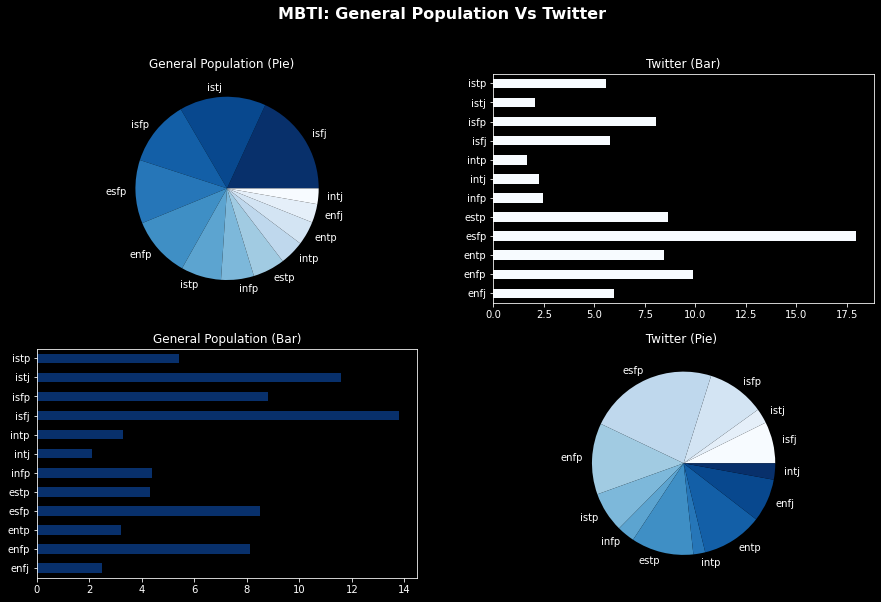

'Summary'

,istj,esfp,isfj,entp,estp,enfj,infp,enfp,intp,isfp,intj,istp
twitter,2.1%,17.9%,5.8%,8.4%,8.7%,6.0%,2.5%,9.9%,1.6%,8.0%,2.3%,5.6%
general population,11.6%,8.5%,13.8%,3.2%,4.3%,2.5%,4.4%,8.1%,3.3%,8.8%,2.1%,5.4%
abs_diff,9.5%,9.4%,8.0%,5.2%,4.4%,3.5%,1.9%,1.8%,1.6%,0.8%,0.2%,0.2%


In [103]:


tochart.sort_values(by='general population',ascending=False,inplace=True)

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)
m=.75
fig = plt.figure(constrained_layout=False,figsize=(m*20,m*12.361))

gs = GridSpec(2, 2, figure=fig)

# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))



plt.suptitle('MBTI: General Population Vs Twitter',fontsize=16,weight='demibold')





ax1 = fig.add_subplot(gs[0, 0])
kwargs1={'title':'General Population (Pie)   ','ax':ax1,'legend':False,'ylabel':'',   'cmap':'Blues_r'}

tochart.plot.pie(y='general population',**kwargs1)



ax2 = fig.add_subplot(gs[1, 1])

kwargs2={'title':'  Twitter (Pie)   ','ax':ax2,'legend':False,'ylabel':'',   'cmap':'Blues'}
tochart.plot.pie(y='twitter',**kwargs2)


ax3 = fig.add_subplot(gs[0,1])
kwargs3={'ax':ax3,'legend':False,'title':'Twitter (Bar)',   'cmap':'Blues'}

tochart.sort_index().plot.barh(y='twitter',**kwargs3)




ax4 = fig.add_subplot(gs[1, 0])
kwargs4={'ax':ax4,'legend':False,'title':'General Population (Bar)',   'cmap':'Blues_r'}
tochart.sort_index().plot.barh(y='general population',**kwargs4)

plt.show()




fig.suptitle("GridSpec")
format_axes(fig)

plt.show()




display('Summary',styledf)


In [104]:

pd.to_pickle(aggName_df,'aggName.pkl')
aggName_df=pd.read_pickle('aggName.pkl')
   
freq=list(aggName_df.freqTableCeleb.values)
freqtables=[]
for f in freq:
  
    newdict=dict(f)
    keys=newdict.keys()
    lastdict=dict()
    for k in keys:
        lastdict.update({k:int(newdict.get(k))})

     
    freqtables.append(lastdict)
    # curlist=str(dict(f)).strip().replace('[','').replace(']','').replace("'",'').replace('"','').replace(".",'').strip().split()
    



In [82]:


    
len(freqtables)
aggName_df['freqTableCeleb']=freqtables

aggName_df

,name,type,handle,date,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableCeleb,noon_21,fiveAm_noon,nightowl
0,anggun official,enfj,Anggun_Cipta,"[2018-12-18 04:07:37+00:00, 2018-12-19 04:50:1...",31232,4890,diplomat,e,n,f,j,[I love hearing my voice dubbed in German 😊. #...,"[love, hearing, voice, dubbed, german, artede,...","{'annoyed': 83, 'uneasy': 83, 'hesitant': 83, ...",45.4,38.1,16.5
1,ansel elgort,enfj,AnselElgort,"[2014-01-25 22:35:29+00:00, 2014-01-26 05:40:2...",3652646,1287249,diplomat,e,n,f,j,[COOKIEEESSS Aaayyyyy #girlscouts #austintexas...,"[aaayyyyy, could, call, candy, played, lazer, ...","{'happy': 85, 'face': 75, 'smiley': 70, 'tfios...",55.1,8.2,36.7
2,ashton irwin,enfj,Ashton5SOS,"[2021-01-30 21:22:27+00:00, 2021-01-31 18:18:3...",10404214,1279713,diplomat,e,n,f,j,"[@vauItlive Yeah I’m just doing laundry lol, P...","[yeah, laundry, lol, pennys, fan, pink, sweate...","{'love': 52, 'annoyed': 47, 'hesitant': 47, 'u...",68.7,6.6,24.7
3,basti schweinsteiger,enfj,BSchweinsteiger,"[2020-11-28 13:08:00+00:00, 2020-12-03 16:32:0...",3027159,245013,diplomat,e,n,f,j,[Sea or Mountains - what's your favorite? #thr...,"[favorite, annoyed, uneasy, hesitant, classic,...","{'uneasy': 188, 'hesitant': 188, 'annoyed': 18...",67.2,29.4,3.4
4,carles puyol,enfj,Carles5puyol,"[2016-10-30 12:55:05+00:00, 2016-11-27 14:44:3...",1842861,231403,diplomat,e,n,f,j,[Nice too meet you! @NikiLauda_F1 Loved chatti...,"[nice, meet, loved, chatting, best, annoyed, u...","{'annoyed': 19, 'uneasy': 19, 'hesitant': 19, ...",73.9,11.6,14.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,tiger woods,istp,TigerWoods,"[2018-02-25 00:15:12+00:00, 2018-03-02 15:34:5...",7187969,576830,explorer,i,s,t,p,[Happy 80th bday Phil. Thanks for believing in...,"[happy, bday, phil, thanks, could, trust, reco...","{'woods': 250, 'news': 207, 'tgr': 206, 'annoy...",39.5,3.3,57.2
481,tom cruise,istp,TomCruise,"[2013-10-12 22:01:48+00:00, 2013-10-13 00:03:2...",5620511,983051,explorer,i,s,t,p,"[Permission to unlock, granted! -TeamTC @Teaah...","[unlock, granted, teamtc, haha, omg, love, pic...","{'uneasy': 223, 'annoyed': 223, 'hesitant': 22...",54.1,2.9,43.1
482,tony hawk,istp,tonyhawk,"[2020-07-04 17:51:53+00:00, 2020-07-04 17:54:0...",8077033,605767,explorer,i,s,t,p,"[@kiwi_colt Ripping!, @ReverendJamie @robdyrde...","[kiwi, colt, ripping, spirit, internet, search...","{'hesitant': 188, 'uneasy': 188, 'annoyed': 18...",42.9,9.0,48.0
483,wayne rooney,istp,WayneRooney,"[2018-04-30 12:49:07+00:00, 2018-05-05 20:42:0...",6448444,491594,explorer,i,s,t,p,[Brilliant to be involved in the @Everton kit ...,"[involved, everton, kit, shoot, white, diamond...","{'hesitant': 225, 'annoyed': 225, 'uneasy': 22...",64.0,27.8,8.2


In [ ]:
topLevelGroups=['type',
'domain',
'i_e',
'n_s',
't_f',
'j_p']
grudict={i:{} for i in topLevelGroups}


topLevelGroupsDflist=[]

for gru in topLevelGroups:

    typegroups=aggName_df.groupby(gru)

   
   



    typekeys=typegroups.groups.keys()
    count=0
    for key in typekeys:
        aggType ={
        'names':{},
        'type':{},
        'handles':{},
        'dates':{},
        'likeCount':{},
        'retweetCount':{},
        'domain':{},
        'i_e':{},
        'n_s':{},
        't_f':{},
        'j_p':{},
        'docs':{},
        'lemmatized':{},
        'freqTableGroup':{},
        'noon_21':{},
        'fiveAm_noon':{},
        'nightowl':{}
        }
    
          

        
        df=typegroups.get_group(key)


        noon_21=df.noon_21
        fiveAm_noon=df.fiveAm_noon
        nightowl=df.nightowl
        noon_21=float(f'{(noon_21/len(noon_21)).sum():.1f}')
        fiveAm_noon=float(f'{(fiveAm_noon/len(fiveAm_noon)).sum():.1f}')
        nightowl=float(f'{(nightowl/len(nightowl)).sum():.1f}')
    
        aggType['names'].update({count:df.name.unique()})
    
        aggType['handles'].update({count:df.handle.unique()})
        aggType['dates'].update({count:df.date.values})

        aggType['noon_21'].update({count:noon_21})
        aggType['fiveAm_noon'].update({count:fiveAm_noon})
        aggType['nightowl'].update({count:nightowl})
        aggType['likeCount'].update({count:likeCount.sum()})
        aggType['retweetCount'].update({count:retweetCount.sum()})
        aggType['domain'].update({count:set(df.domain.unique())})
        aggType['type'].update({count:set(df.type.unique())})
        aggType['i_e'].update({count:set(df.i_e.unique())})
        aggType['n_s'].update({count:set(df.n_s.unique())})
        aggType['t_f'].update({count:set(df.t_f.unique())})
        aggType['j_p'].update({count:set(df.j_p.unique())})
        aggType['docs'].update({count:df.docs.values})
        lemmatized=[]
        dflemma=list(df.lemmatized.values)
        [lemmatized.extend(str(i).strip(' ').strip('[').strip(']').strip('"').strip("'")) for i in dflemma]

        strings=lemmatized
        print(strings)
        freqtable=dict(pd.Series(strings).value_counts())
      
        aggType['lemmatized'].update({count:lemmatized})
        aggType['freqTableGroup'].update({count:freqtable})
        
        
        grudict[f'{gru}'].update({key:pd.DataFrame(aggType)})

        count+=1





In [84]:
grudict.keys()

dict_keys(['type', 'domain', 'i_e', 'n_s', 't_f', 'j_p'])

analyst
diplomat
explorer
sentinel
 slight       16
 giant        80
 lfc         176
 pranav        4
 lea           8
            ... 
 tide         16
 broader       4
 dismaymj      4
 jest          4
 elmsford      4
Length: 22992, dtype: int64
 annoyed     10921
 uneasy      10919
 hesitant    10913
 new          1775
 love         1299
             ...  
 kemper          1
 scraping        1
 scows           1
 smoker          1
 grower          1
Length: 22992, dtype: int64
 annoyed     10921
 uneasy      10919
 hesitant    10913
 new          1775
 love         1299
             ...  
 kemper          1
 scraping        1
 scows           1
 smoker          1
 grower          1
Length: 22992, dtype: int64
 annoyed     10921
 uneasy      10919
 hesitant    10913
 new          1775
 love         1299
             ...  
 kemper          1
 scraping        1
 scows           1
 smoker          1
 grower          1
Length: 22992, dtype: int64
 annoyed     10921
 uneasy      10919
 

[None, None, None, None, None]

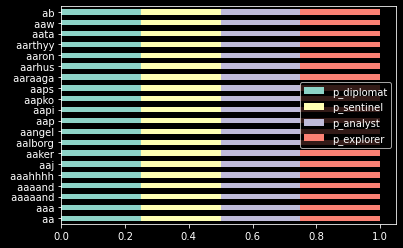

In [68]:
# typelist=[]
# for key in grudict['domain'].keys():
#     print(key)
#     typelist.append(grudict['domain'].get(key).freqTableGroup.values[0])

# keyset=set()

# [keyset.update(i.keys()) for i in typelist]


# bigdict={i:[] for i in keyset}
# for d in typelist:
#     for i,v in d.items():
#         bigdict[i].append(v)
# [bigdict.update({i:sum(bigdict[i])}) for i in (bigdict.keys())]
# words=pd.Series(bigdict)

# wordslist=[]
# collist=[]
# for key in grudict['domain'].keys():

#     wordslist.append(pd.Series(grudict['domain'].get(key).freqTableGroup.values[0]))
#     collist.append(key)
# wordslist.append(words)
# collist.append('combined')
# wordslist.reverse()
# collist.reverse()

# word_counts = (pd.concat(wordslist, axis=1, sort=True)
#                 .set_axis(collist, axis=1, inplace=False)
#                 .fillna(0)
#                 .apply(lambda s: s.astype(int)))

# word_counts.head()
# percentlist=[]
# for i in list(set(word_counts.columns)-{'combined'}):
#     word_counts[f'p_{i}']=word_counts[i]/word_counts.combined
#     percentlist.append(f'p_{i}')
# word_counts[percentlist].head(20).plot.barh(stacked=True)

# [print(i) for i in wordslist]


In [85]:
from itertools import combinations
vennfigsize=(10,10)




grudict['domain'].keys()
for i in grudict['domain'].keys():
    display(i,display(grudict['domain'].get(i)))

,names,type,handles,dates,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableGroup,noon_21,fiveAm_noon,nightowl
0,"[busta rhymes, chris paul, dana white, dr. dre...","{intp, intj, entj, entp}","[BustaRhymes, CP3, danawhite, drdre, LizGillie...","[[2021-08-15 18:07:02+00:00, 2021-08-17 12:30:...",969542,264709,{analyst},"{i, e}",{n},{t},"{p, j}","[[PUT OUT WHAT YOU WANT BACK, THE GREATNESS AI...","[[put, back, aint, never, stoppin, stop, playi...","{' annoyed': 10921, ' uneasy': 10919, ' hesita...",49.4,15.2,35.4


'analyst'

None

,names,type,handles,dates,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableGroup,noon_21,fiveAm_noon,nightowl
1,"[anggun official, ansel elgort, ashton irwin, ...","{infp, enfp, infj, enfj}","[Anggun_Cipta, AnselElgort, Ashton5SOS, BSchwe...","[[2018-12-18 04:07:37+00:00, 2018-12-19 04:50:...",969542,264709,{diplomat},"{i, e}",{n},{f},"{p, j}",[[I love hearing my voice dubbed in German 😊. ...,"[[love, hearing, voice, dubbed, german, artede...","{' annoyed': 13660, ' uneasy': 13659, ' hesita...",51.3,17.8,30.9


'diplomat'

None

,names,type,handles,dates,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableGroup,noon_21,fiveAm_noon,nightowl
2,"[adam lambert, adam levine, akon, alyssa milan...","{estp, istp, isfp, esfp}","[adamlambert, adamlevine, Akon, Alyssa_Milano,...","[[2020-02-04 05:02:52+00:00, 2020-02-04 09:08:...",969542,264709,{explorer},"{i, e}",{s},"{f, t}",{p},[[ROSES ft. @nilerodgers is out!! 🌹🌹 Pre-order...,"[[roses, ft, pre, order, full, velvet, coming,...","{' annoyed': 28288, ' uneasy': 28284, ' hesita...",48.3,15.0,36.7


'explorer'

None

,names,type,handles,dates,likeCount,retweetCount,domain,i_e,n_s,t_f,j_p,docs,lemmatized,freqTableGroup,noon_21,fiveAm_noon,nightowl
3,"[angel locsin, anupam kher, anushka sharma, ch...","{estj, istj, esfj, isfj}","[143redangel, AnupamPkher, AnushkaSharma, Chri...","[[2020-07-19 10:20:50+00:00, 2020-07-19 16:36:...",969542,264709,{sentinel},"{i, e}",{s},"{f, t}",{j},[[For the visually impaired ❤️ \n\n#ibaYan htt...,"[[visually, impaired, ibayan, annoyed, uneasy,...","{' annoyed': 15899, ' uneasy': 15897, ' hesita...",49.8,18.8,31.4


'sentinel'

None

 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

                                         Analyst vs Diplomat

  _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _


intersection set length:
11761
intersection frequency set length:
544360
union set length:
35735
union frequency set length:
588850
intersection freq divided by union freq percent:
92.44%
symmetric diff freq divided by union freq percent (words not in intersection):
7.56%
unique to analyst freq:
0.00% 
unique to diplomat freq:
3.95% 
Abs diff unique ratio from analyst and diplomat:
3.95% 
analyst freq contribution to intersection:
44.00% 
diplomat freq contribution to intersection:
56.00% 


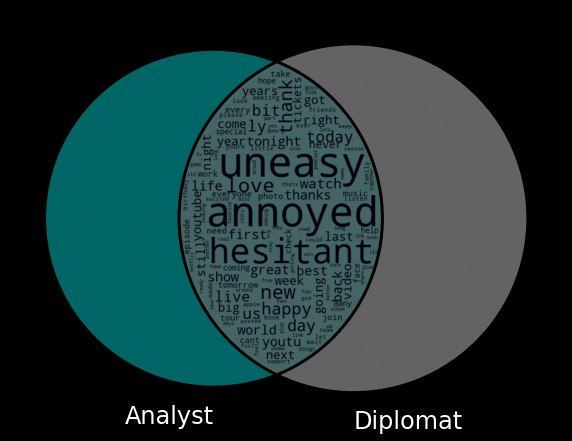

AttributeError: 'numpy.int64' object has no attribute 'append'

In [91]:

 
key='domain'
subgrukey=grudict[key].keys()
combos=combinations(subgrukey,2)
for c in combos:
    commondict={}
    ckeys=set()
    a=list(grudict[key].get(c[0]).freqTableGroup)[0]
    b=list(grudict[key].get(c[1]).freqTableGroup)[0]


 
    
    akeys=set((a).keys())
    bkeys=set((b).keys())     
    ckeys.update(akeys)
    ckeys.update(bkeys)
    ckeys=list(ckeys)
    commondict={i:[] for i in ckeys}
    [commondict[i].append(a.get(i)) for i in akeys]
    [commondict[i].append(b.get(i)) for i in bkeys]    
    [commondict.update({i:sum(commondict.get(i))}) for i in ckeys]   

    k=c[0]
    kplus1=c[1]
    kfreq=a
    kplus1freq=b
    kthset=set(kfreq.keys())
    kthplus1set=set(kplus1freq.keys())
    inter=kthplus1set&kthset
    union=kthplus1set|kthset
    sym=kthplus1set.symmetric_difference(kthset)
    
    
    combinedfreq=commondict

    totalwords=(sum(list(combinedfreq.values())))
    interfreq=[]
    for i in inter:
        interfreq.append(combinedfreq.get(i))
    interfreq=(sum(interfreq))
    disimularfreq=[]
    for i in sym:    
        disimularfreq.append(combinedfreq.get(i))
    disimularfreq=(sum(disimularfreq))
    unique_to_k=kthset-kthplus1set
    unique_k_freq=[]
    for i in unique_to_k:    
        unique_k_freq.append(combinedfreq.get(i))
        unique_k_freq=sum(unique_k_freq)
        unique_to_k_plus_1=kthplus1set-kthset
        unique_to_k_plus_1_freq=[]
        for i in unique_to_k_plus_1:    
            unique_to_k_plus_1_freq.append(combinedfreq.get(i))
        unique_to_k_plus_1_freq=sum(unique_to_k_plus_1_freq)


        kthinterfreq=[]
        for i in inter:
            kthinterfreq.append(kfreq.get(i))
        kthinterfreq=sum(kthinterfreq)

        kplus1freqinterfreq=[]
        for i in inter:
            kplus1freqinterfreq.append(kplus1freq.get(i))
        kplus1freqinterfreq=sum(kplus1freqinterfreq)

        combined_intersection_freq=[]
        for i in inter:
            combined_intersection_freq.append(combinedfreq.get(i))
        combined_intersection_freq=sum(combined_intersection_freq)



    
   

        fig,ax=plt.subplots(figsize=vennfigsize)
        title=f'{k.capitalize()} vs {kplus1.capitalize()}'

        # [unionwithoutk.update(set(newdict.get(cop)))for cop in keyscopy]
        print(f'{"_":>2}'*45,f'\n\n{title:>60}\n\n',f'{"_":>2}'*45)
        print(f'\n\nintersection set length:\n{len(inter)}')
        print(f'intersection frequency set length:\n{interfreq}')
        print(f'union set length:\n{len(union)}')
        print(f'union frequency set length:\n{totalwords}')


        print(f'intersection freq divided by union freq percent:\n{((interfreq)/(totalwords))*100:.2f}%')
        print(f'symmetric diff freq divided by union freq percent (words not in intersection):\n{((disimularfreq)/(totalwords))*100:.2f}%')
        print(f'unique to {k} freq:\n{((unique_k_freq)/(totalwords))*100:.2f}% ')
        print(f'unique to {kplus1} freq:\n{((unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')

        print(f'Abs diff unique ratio from {k} and {kplus1}:\n{abs((unique_k_freq)/(totalwords)-(unique_to_k_plus_1_freq)/(totalwords))*100:.2f}% ')

        print(f'{k} freq contribution to intersection:\n{((kthinterfreq)/(combined_intersection_freq))*100:.2f}% ')
        print(f'{kplus1} freq contribution to intersection:\n{((kplus1freqinterfreq)/(combined_intersection_freq))*100:.2f}% ')




    




        venn2_wordcloud([kthset,kthplus1set], set_colors=['aqua','ghostwhite'],set_edgecolors=['0', '0'],ax=ax,set_labels=[f'{k.capitalize()}',f'{kplus1.capitalize()}'],word_to_frequency=combinedfreq)#
        plt.show()
    

        print('\n')
        print('\n')


       


